# Análise de Mídias Sociais: Twitter

Para autenticar no twitter, temos que criar uma conta e accessar: <br />
http://twitter.com/apps/ <br />
Gerar as chaves de autenticação, ex:<br />
CONSUMER_KEY = 'Riew8e4LKVoEJ51HbeOm6wsYA' <br />
CONSUMER_SECRET = '3pPE1z3kTJGQiY93yCqgLUTURJO2wOcoQCcMbyMbCj4Gm9Hc6N' <br />
OAUTH_TOKEN = '2904474861-kdalTd2NVus3q0PdvAiD3gB2IlF9IFZzao01ol7' <br />
OAUTH_TOKEN_SECRET = '2yHMlMAEUZflpw5swYaLA8EjFyPyPJWnJT84VJoAHDKCU' <br />

## Modulo para autenticação no twitter

In [1]:
import twitter

def oauth_login():
    # XXX: Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'Riew8e4LKVoEJ51HbeOm6wsYA'
    CONSUMER_SECRET = '3pPE1z3kTJGQiY93yCqgLUTURJO2wOcoQCcMbyMbCj4Gm9Hc6N'
    OAUTH_TOKEN = '2904474861-kdalTd2NVus3q0PdvAiD3gB2IlF9IFZzao01ol7'
    OAUTH_TOKEN_SECRET = '2yHMlMAEUZflpw5swYaLA8EjFyPyPJWnJT84VJoAHDKCU'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

# Sample usage
twitter_api = oauth_login()    

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print (twitter_api)

## Módulo para buscar tweets, dado uma palavra

In [2]:
def twitter_search(twitter_api, q, max_results=1000, **kw):  #max_results=200

    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets and 
    # https://dev.twitter.com/docs/using-search for details on advanced 
    # search criteria that may be useful for keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    search_results = twitter_api.search.tweets(q=q, count=1000, **kw)   # count=100
    
    statuses = search_results['statuses']
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://dev.twitter.com/docs/rate-limiting/1.1/limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.
    
    # Enforce a reasonable limit
    max_results = min(1000, max_results)
    
    for _ in range(10): # 10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError: # No more results when next_results doesn't exist
            break
            
        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

## Salvando/Recuperando no MongoDB

In [3]:
import json
import pymongo # pip install pymongo


def save_to_mongo(data, mongo_db, mongo_db_coll, **mongo_conn_kw):
    
    # Connects to the MongoDB server running on 
    # localhost:27017 by default
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    
    # Get a reference to a particular database
    
    db = client[mongo_db]
    
    # Reference a particular collection in the database
    
    coll = db[mongo_db_coll]
    
    # Perform a bulk insert and  return the IDs
    
    return coll.insert_many(data)

def load_from_mongo(mongo_db, mongo_db_coll, return_cursor=False,
                    criteria=None, projection=None, **mongo_conn_kw):
    
    # Optionally, use criteria and projection to limit the data that is 
    # returned as documented in 
    # http://docs.mongodb.org/manual/reference/method/db.collection.find/
    
    # Consider leveraging MongoDB's aggregations framework for more 
    # sophisticated queries.
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    db = client[mongo_db]
    coll = db[mongo_db_coll]
    
    if criteria is None:
        criteria = {}
    
    if projection is None:
        cursor = coll.find(criteria)
    else:
        cursor = coll.find(criteria, projection)

    # Returning a cursor is recommended for large amounts of data
    
    if return_cursor:
        return cursor
    else:
        return [ item for item in cursor ]

## Capturando tweets

In [27]:
q = 'tesla'

twitter_api = oauth_login()
results = []
for i in range(40):
    result = twitter_search(twitter_api, q, max_results=1000)
    print ('capturando ', len(result),' tweets...')
    #results.append(result)
    results += result
#print(type(result))
#print(type(results))
print("Numero de tweets capturados: ", len(results))

#results = twitter_search(twitter_api, q, max_results=1000)
#save_to_mongo(results, 'tweets', q)

capturando  87  tweets...
capturando  87  tweets...
capturando  87  tweets...
capturando  87  tweets...
capturando  87  tweets...
capturando  88  tweets...
capturando  88  tweets...
capturando  89  tweets...
capturando  90  tweets...
capturando  90  tweets...
capturando  90  tweets...
capturando  90  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  81  tweets...
capturando  81  tweets...
capturando  81  tweets...
capturando  81  tweets...
capturando  81  tweets...
capturando  82  tweets...
capturando  82  tweets...
capturando  81  tweets...
capturando  81  tweets...
capturando  81  tweets...
capturando  78  tweets...
capturando  75  tweets...
capturando  75  tweets...
capturando  75  tweets...
capturando  

## imprimindo tweets

In [28]:
i = 0
for tweet in results:
    print(tweet['created_at'], ' >> ', tweet['text']) #, " >> ") #, tweet['place'])
    i += 1
    if i > 10:
          break

Sat Apr 07 00:35:09 +0000 2018  >>  RT @CaroleFor45KAG: Some info about our President-
John Trump, Donald’s Uncle: 5 Fast Facts You Need to Know https://t.co/l2E5rY5BRO via @h…
Sat Apr 07 00:35:08 +0000 2018  >>  #EfektoInternacional 
Vuelve a fallar autopiloto de Tesla; el conductor evitó un choque. Aquí más noticias del mund… https://t.co/HLmw1S99YM
Sat Apr 07 00:35:06 +0000 2018  >>  RT @AngleseaAC: How Elon Musk's big Tesla battery is changing Australia's power landscape (Its unique ability to deliver power instantaneou…
Sat Apr 07 00:35:06 +0000 2018  >>  RT @elonmusk: Tesla Goes Bankrupt
Palo Alto, California, April 1, 2018 -- Despite intense efforts to raise money, including a last-ditch ma…
Sat Apr 07 00:35:02 +0000 2018  >>  RT @comediandan: Drove the Tesla right up to the jet, hopped on and flew to Abaco in the Bahamas. https://t.co/vO8J1WIIdT
Sat Apr 07 00:34:58 +0000 2018  >>  RT @MikeCarlton01: How could this be ?  Expert scientists and engineers such as Chris Kenny and Ma

## Nuvem de Palavras - tweet

### Stopwords

In [ ]:
# instalando o módulo de stopwords
#!pip install stop-words

In [29]:
from stop_words import get_stop_words
stop_words_english = get_stop_words('en')
#stop_words
stop_words_portugues = get_stop_words('pt')
#stop_words_portugues
stop_words = stop_words_english + stop_words_portugues
print(stop_words[:10])
print(stop_words[-10:])

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and']
['tém', 'tínhamos', 'um', 'uma', 'você', 'vocês', 'vos', 'à', 'às', 'éramos']


300297


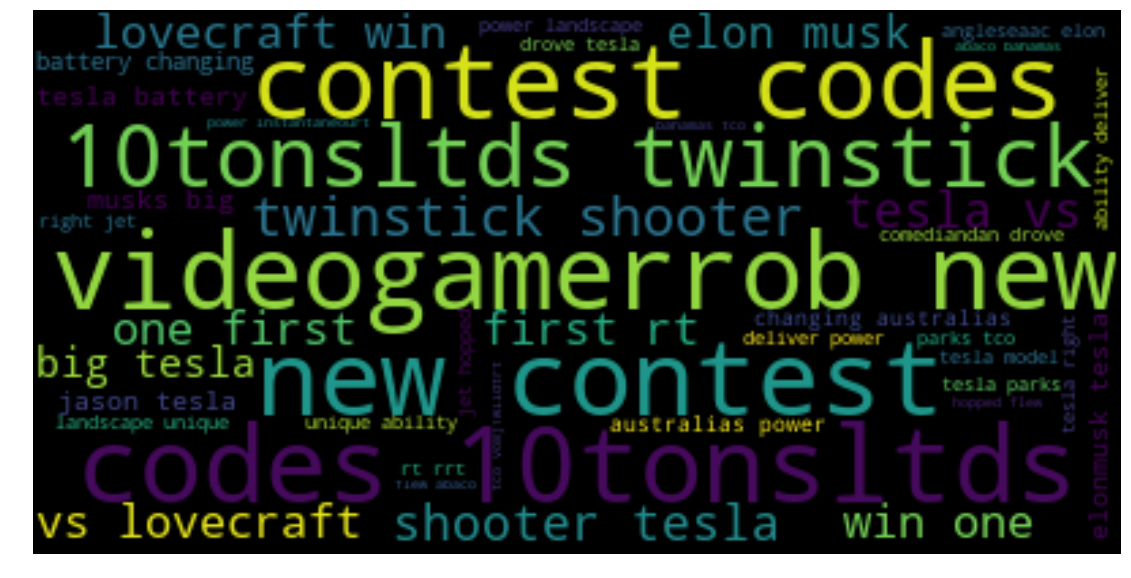

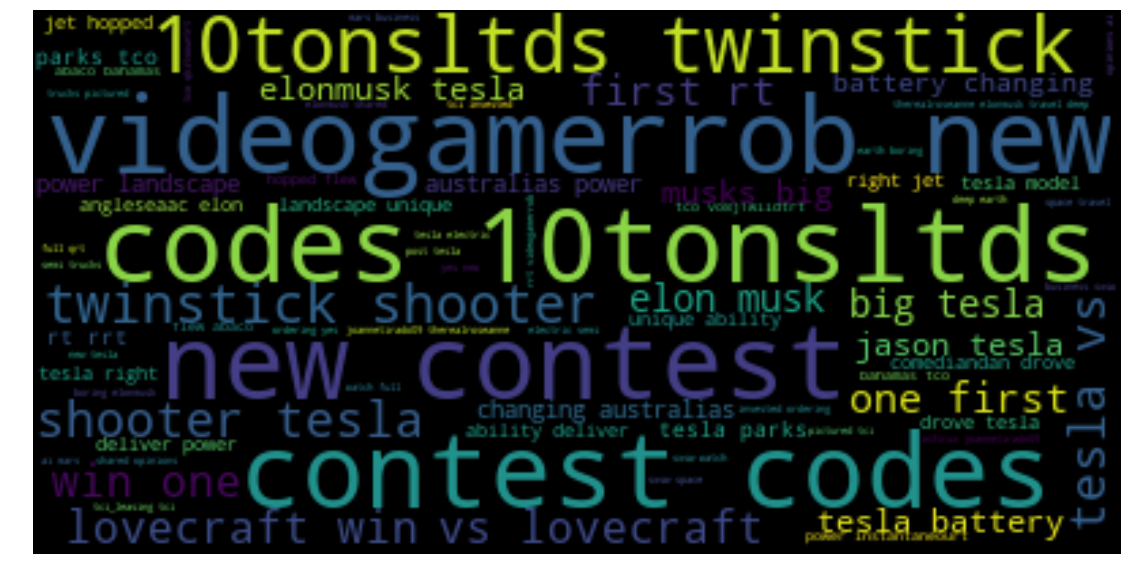

In [30]:
# nuvem de palavras
from wordcloud import WordCloud, STOPWORDS
import re

stext = ""
for tweet in results:
    if 'text' in tweet:
        stext = stext + tweet['text']
stext = stext.lower()

# retirando pontuações e outros caracteres não relevantes
stext = "".join([i for i in stext if ord(i)<128])
stext = stext.replace("http://","")
stext = stext.replace("https://","")
stext = stext.replace("https","")
stext = stext.replace(",","")
stext = stext.replace(".","")
stext = stext.replace("?","")
stext = stext.replace("!","")
stext = stext.replace("#","")
stext = stext.replace("@","")
stext = stext.replace("'","")
stext = stext.replace("-","")
stext = stext.replace("3","")
stext = stext.replace("&amp;","")
stext = stext.replace("|","")



# retirando as stopwords dos tweets
for word in stop_words:
    my_regex = r"\b(?=\w)" + re.escape(word) + r"\b(?!\w)"
    stext = re.sub(my_regex,"" ,stext)

print(len(stext))


# Generate a word cloud image
wordcloud = WordCloud().generate(stext)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(stext)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Estatistica de contagem de palavras

In [31]:
words = stext.split()

In [32]:
from collections import Counter

c = Counter(words)
#print (c.most_common()[:30])
most_common = c.most_common()[:40]

for i in most_common:
    print (i[0])
#for item in words:  #[words, screen_names, hashtags]:
#    c = Counter(item)
#    print (c.most_common()[:20]) # top 10
#    print 

tesla
new
power
first
one
rt
elonmusk
big
videogamerrob:
contest:
codes
10tonsltds
twinstick
shooter
vs
lovecraft
win
elon
battery
model
musks
changing
australias
landscape
rrt
jason:
parks
right
angleseaac:
(
unique
ability
deliver
car
just
drove
comediandan:
jet
hopped
flew


In [33]:
for i in range(15):
    print (c.popitem())

('tco/jvnxlvvqbs', 1)
('tco/jvnxlvvqbsrt', 4)
('tco/ol0nrhnjowsologuaro', 6)
('anythingshewants', 6)
('engraved', 6)
('btw', 6)
('fitsoh', 6)
('helmet', 6)
('vest', 12)
('tco/vo8j1wiidtmomdad', 6)
('estrellanrt', 7)
('uber', 7)
('esos', 7)
('con', 7)
('pilas', 7)


## colocando as palavras e suas frequencias do twitter num dataframe

In [34]:
import pandas as pd
df = pd.DataFrame(([word, freq] for word, freq in most_common), columns=['Word', 'Frequency'])
df[:15]

,Word,Frequency
0,tesla,2782
1,new,486
2,power,464
3,first,458
4,one,435
5,rt,424
6,elonmusk,415
7,big,392
8,videogamerrob:,383
9,contest:,383


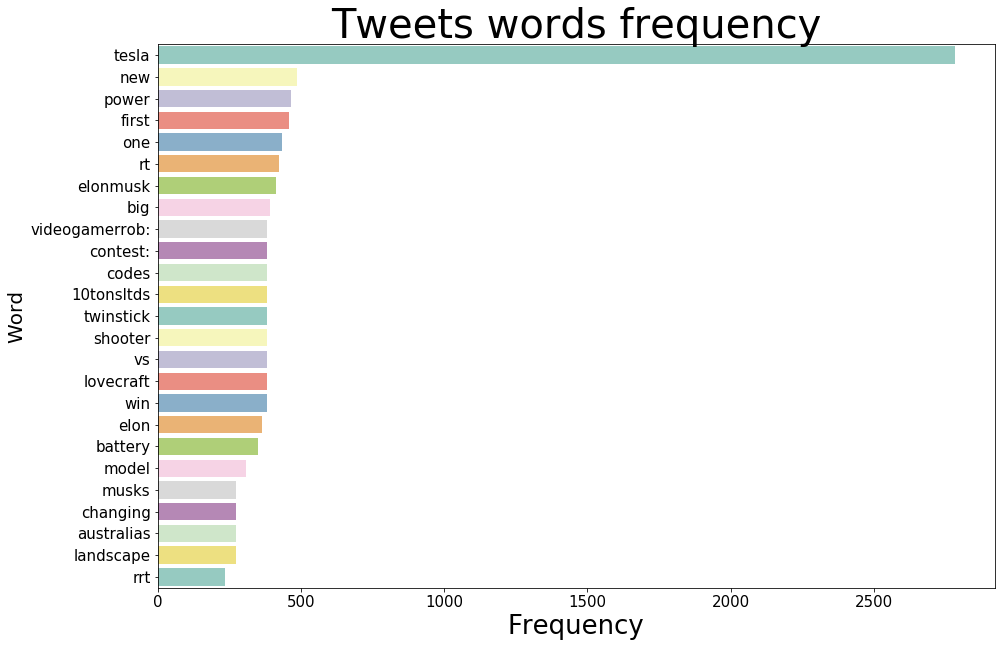

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:25]

ax = sns.barplot(y='Word', x = 'Frequency', data=df2, palette="Set3" )
#sns.despine()
ax.set(xlabel='Tweets words frequency', ylabel='Word')
#ax.set(xticks=range(1, 9), xticklabels=list([10,20,30,40,50,60,70,80,90]))

#ax.set(xticklabels=list(range(0,90,10)))
#plt.figure(figsize=(20,10))

ax.axes.set_title("Tweets words frequency",fontsize=40)
ax.set_xlabel("Frequency",fontsize=26)
ax.set_ylabel("Word",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

## achar os países de onde foram gerados os tweets

In [36]:
place = []
for result in results:
    if 'place'in result and result['place']:
        place.append(result['place']['country'])
place = set(place)
print(len(place) )
print(place)

2
{'United Kingdom', 'United States'}


In [37]:
# cidades
place = []
for result in results:
    if 'user'  in result:
        place.append(result['user']['location'])
location = set(place)
len(location)

62

In [38]:
for i in range(15):
    print(location.pop())


Wangaratta, VIC
✈️Louisiana✈️Florida✈️Houston
Seaford Meadows Shopping Ctr
Boston, MA
Columbus, OH
Tampa
España
Vancouver, B.C.
Hobart, Australia
NewYork - Seattle, USA
Columbia, South Carolina
Pima County 
Cheshire
Somewhere


## contar a ocorrencia de cada cidade

In [39]:
from collections import Counter

c = Counter(location)
#print(c)
cidades = c.items()

## colocando as cidades, frequencia num dataframe e salvando no excel

In [40]:
import pandas as pd
df = pd.DataFrame(([cidade, freq] for cidade, freq in cidades), columns=['city', 'frequency'])

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('cidades.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
df[:15]

,city,frequency
0,"Charlotte, North Carolina",1
1,"Louisville, CO",1
2,Las Vegas,1
3,"Las Noches, Huco Mundo",1
4,United Kingdom,1
5,Canada,1
6,"Palo Alto, CA",1
7,Lima - Perú,1
8,Mornington Victoria Australia,1
9,Proliferating globally,1


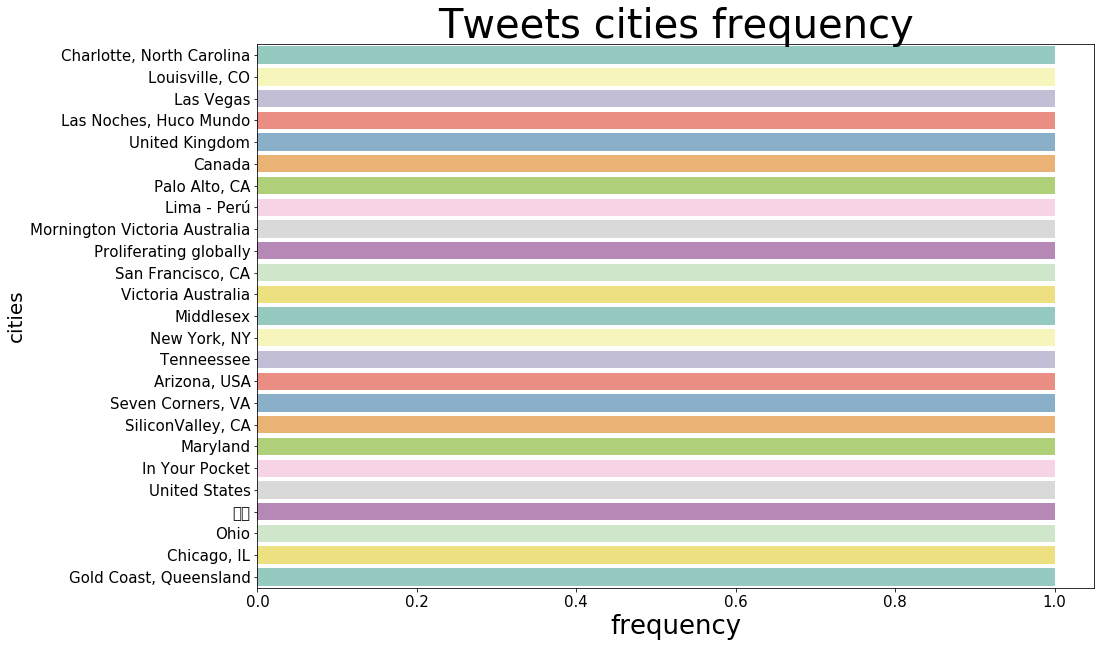

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:25]

ax = sns.barplot(y='city', x = 'frequency', data=df2, palette="Set3" )
ax.set(xlabel='Tweets cities frequency', ylabel='cities')
ax.axes.set_title("Tweets cities frequency",fontsize=40)
ax.set_xlabel("frequency",fontsize=26)
ax.set_ylabel("cities",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

## Capturar tweets com coodenadas de lat, long para cidade

In [42]:
def captura_tweets_com_coordenadas(tweets):
    tweets_com_coordenadas = []
    for tweet in tweets:
        if tweet['place'] is not None:
            tweets_com_coordenadas.append(tweet)
    return (tweets_com_coordenadas)

In [43]:
tweets_com_coordenadas = captura_tweets_com_coordenadas(results)
print(len(tweets_com_coordenadas))

57


In [44]:
tweets_com_coordenadas[0]['place']['bounding_box']

{'coordinates': [[[-115.384091, 36.129459],
   [-115.062159, 36.129459],
   [-115.062159, 36.336371],
   [-115.384091, 36.336371]]],
 'type': 'Polygon'}

In [45]:
tweets_com_coordenadas[0]['place']['bounding_box']['coordinates']

[[[-115.384091, 36.129459],
  [-115.062159, 36.129459],
  [-115.062159, 36.336371],
  [-115.384091, 36.336371]]]

In [46]:
tweets_com_coordenadas[0]['place']['bounding_box']['coordinates'][0][0]

[-115.384091, 36.129459]

In [47]:
def captura_coordenadas(tweets):
    coordenadas = []
    for tweet in tweets:
        coord = tweet['place']['bounding_box']['coordinates'][0][0]
        coordenadas.append(coord)
    return coordenadas

In [48]:
tweets_coordenadasXY = captura_coordenadas(tweets_com_coordenadas)
tweets_coordenadasXY[:5]

[[-115.384091, 36.129459],
 [-115.384091, 36.129459],
 [-115.384091, 36.129459],
 [-115.384091, 36.129459],
 [-115.384091, 36.129459]]

In [49]:
len(tweets_com_coordenadas)

57

In [51]:
latitudes_tweets =  [ y for x,y in tweets_coordenadasXY]
longitudes_tweets =  [ x for x,y in tweets_coordenadasXY]

In [52]:
coordenadas_distintas = set(latitudes_tweets)
len(coordenadas_distintas)

2

In [53]:
latitudes_tweets[:5]

[36.129459, 36.129459, 36.129459, 36.129459, 36.129459]

In [54]:
longitudes_tweets[:5]

[-115.384091, -115.384091, -115.384091, -115.384091, -115.384091]

# Georeferenciar os tweets no mapa mundi

In [55]:
import folium
mapit = folium.Map(location=[30, 0], zoom_start=2)
for coord in tweets_coordenadasXY:
    folium.CircleMarker( location=[ coord[1], coord[0] ], radius=2).add_to( mapit ) 
                    # color='#0080bb', fill_color='#0080bb'
mapit

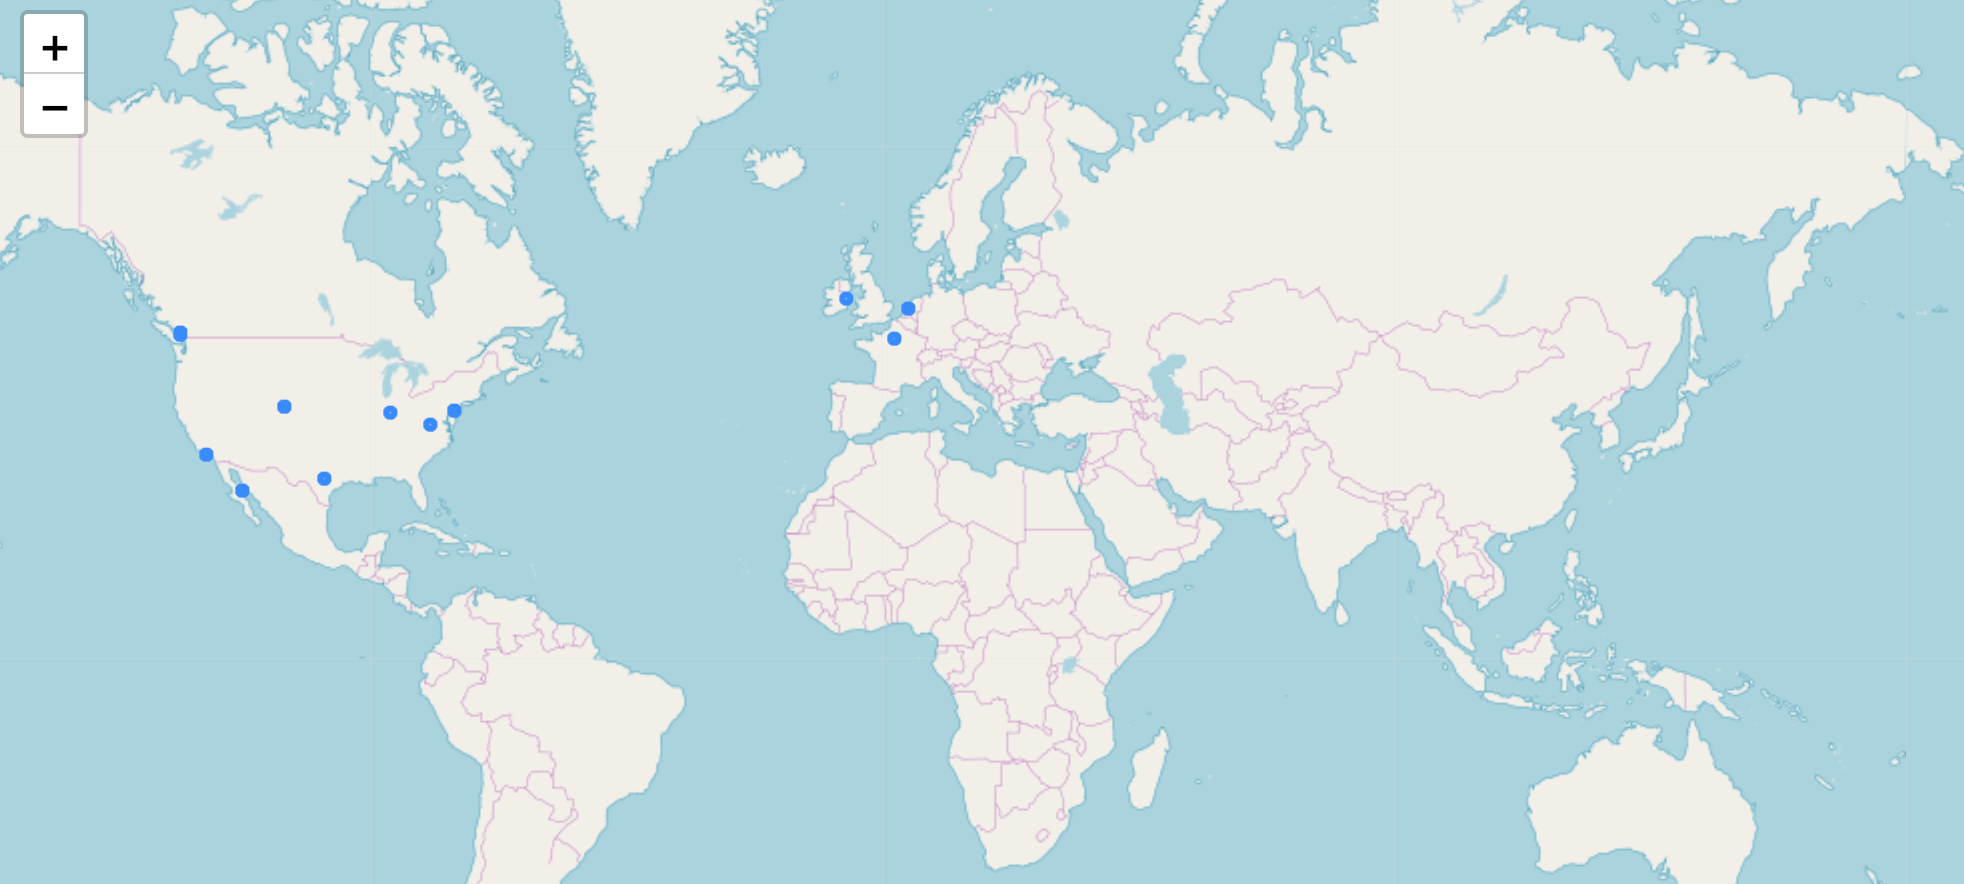

In [56]:
from IPython.display import Image 
Image(filename='folium-map-twitter.png')

In [57]:
# !pip install reverse_geocoder
import reverse_geocoder as rg

coordinates = (51.5214588,-0.1729636),(9.936033, 76.259952)
coordinates=(37.38605,-122.08385)
results = rg.search(coordinates) # default mode = 2
print (results)

Loading formatted geocoded file...
[OrderedDict([('lat', '37.38605'), ('lon', '-122.08385'), ('name', 'Mountain View'), ('admin1', 'California'), ('admin2', 'Santa Clara County'), ('cc', 'US')])]


In [58]:
import reverse_geocoder as rg

#coordinates = (-23.967967, -47.508358)
#cooordinates = (-8.157554, -35.019805 ), (-8.157554, -34.858893)
cordinates = (-43.4161389,-22.8132778)
cordinates = (-22.8132778, -43.4161389)
results = rg.search(coordinates) # default mode = 2
print (results)

[OrderedDict([('lat', '37.38605'), ('lon', '-122.08385'), ('name', 'Mountain View'), ('admin1', 'California'), ('admin2', 'Santa Clara County'), ('cc', 'US')])]


# twitter trends - assuntos mais comentados do momento

In [59]:
import json
import twitter

def twitter_trends(twitter_api, woe_id):
    # Prefix ID with the underscore for query string parameterization.
    # Without the underscore, the twitter package appends the ID value
    # to the URL itself as a special-case keyword argument.
    return twitter_api.trends.place(_id=woe_id)

# Sample usage

twitter_api = oauth_login()

# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/ for details on
# Yahoo! Where On Earth ID

WORLD_WOE_ID = 1
world_trends = twitter_trends(twitter_api, WORLD_WOE_ID)
#print json.dumps(world_trends, indent=1)

US_WOE_ID = 23424977
us_trends = twitter_trends(twitter_api, US_WOE_ID)
#print (json.dumps(us_trends, indent=1))
#us_trends[0]

#for trend in us_trends:
#    print (trend['as_of']['name'])

In [60]:
def find_trends(country_trends):
    trends = country_trends[0]['trends']
    for trend in trends:
        print (trend['name'])

In [61]:
WORLD_WOE_ID = 1
world_trends = twitter_trends(twitter_api, WORLD_WOE_ID)
print ("topicos mais comentados: Mundo")
find_trends(world_trends)

topicos mais comentados: Mundo
#WWEHOF
#ماذا_تقول_لمن_لايثق_بك
#اعتذر_لنفسي_لاني
Ben Simmons
#SuperligaNoSporTV
#ساره_الودعاني
Guede
Patrick Reed
MAKE 30STM GREAT AGAIN
Alejandro Cañizales
The Sixers
O Lula
Manny Machado
Marisa Letícia
TE AMAMOS WAGNER PERCEBA
Jabari Bird
Poncho
Molly Ringwald
Sindicato
Backpage
Neil Warnock
Blake Farenthold
#OcupaSaoBernardo
#DearDonaldJTrump
#KohLanta
#نطالب_بمحاسبه_وزير_التعليم
#السعوديه_فوق_هام_السحب
#AFielÉFoda
#TMYLMTourBrasil
#LaProscripcion
#CopaDavis
#VamosGarinTVN
#Closure
#PartyChilensisFtLaRoja
#JuroQueEsteFinDeSemana
#NEvMTL
#ASSEPSG
#SpockExplainsGIFs
#Ezzati
#NoEsAmorSi
#Apocalipse99
#propagandalive
#MiCasaLydiaBosch
#تويتر_معلق
#TorcidaQueCumpreSeuPapel
#احلام_في_اوبرا_الكويت
#MicaSuarezEnCNN
#MTVBRICONEWHINDERSSON
#سناب_احمدنا
#ViernesIntratable


In [62]:
US_WOE_ID = 23424977
us_trends = twitter_trends(twitter_api, US_WOE_ID)
print ("topicos mais comentados: USA")
find_trends(us_trends)

topicos mais comentados: USA
#WWEHOF
Ben Simmons
#DearDonaldJTrump
The Sixers
Patrick Reed
#SpockExplainsGIFs
Manny Machado
Jabari Bird
Backpage
#NEvMTL
Blake Farenthold
Molly Ringwald
Texas National Guard
#wfaaweather
Amir Johnson
Michael Chavis
Thomas Davis
Tommy Kahnle
Rockwall
Gabby Giffords
Omer Asik
Sean Hannity
Media Influencers
Markieff Morris
Fultz
Rodney Hood
Colby Covington
Casey Mittelstadt
Luis Castillo
Adam Gaudette
The Denver Post
Tony Perkins
Jerry West Award
#UFC25Years
#RevolutionChi
#BUFvsTBL
#dfwwx
#INDYCAR
#Twinder
#Engagechat
#MasterChefJunior
#FineFemalesInMilitary
#DevinHayesVIP
#FridayNight
#QueDaze
#AwkwardSpeedDatingQuestions
#Freaks
#EVOLVE103
#MacGyver
#LynchburgRevival


In [63]:
BR_WOE_ID = 23424768
br_trends = twitter_trends(twitter_api, BR_WOE_ID)
print ("topicos mais comentados: Brasil")
find_trends(br_trends)

topicos mais comentados: Brasil
#SuperligaNoSporTV
#OcupaSaoBernardo
#TMYLMTourBrasil
#AFielÉFoda
MAKE 30STM GREAT AGAIN
Marisa Letícia
TE AMAMOS WAGNER PERCEBA
#Apocalipse99
O Lula
Poncho
Leyva
Vidigal
NUNCA FOI FÁCIL
MUY PRONTO
Globo News
FORTALEZA GLEICIANA
Ben Simmons
Clezar
Basquete Cearense
Márcio França
Ana Furtado
Gypsy
Maninho
Campello
Patrocínio
Batalhão de Choque
Cavani
Tirei Nina e Carminha
Tokio
#Closure
#TorcidaQueCumpreSeuPapel
#MTVBRICONEWHINDERSSON
#ILoveMichaelJacksonBecause
#WelcomeToBrazilHolland
#OndeJaSeViu
#CarinhaDeAnjo360
#NBBnoTwitter
#10YearsOfGaga
#AmanhaEParaSempre035
#NoRolêMTVHITS
#gecorinthians
#WWEHOF
#BatalhaDosChalés
#MLBnaESPN
#LNFnoSporTV
#ComigoAtéOFim
#ShowYourEmotions
#RedeTVNews
#AnnaWintourOutNow
#Arena98


# Análise de Sentimentos - Tweets

In [ ]:
#!pip install textblob

In [15]:
#!pip install googletrans

In [64]:
# googletrans token
from googletrans.gtoken import TokenAcquirer
acquirer = TokenAcquirer()
text = 'test'
tk = acquirer.do(text)
tk

'551544.925400'

In [65]:
from googletrans import Translator
translator = Translator()
translator.translate('oi, tudo bem', src='pt').text

'Hello all well'

In [66]:
from textblob import TextBlob as tb #NLP module
import numpy as np #for some calculation. You may want to use your favorite module for this, such as statistics

# polatidade de tweets em ingles e portugues
def polarity_tweets_pais(query):
    from googletrans import Translator
    
    translator = Translator() # google tradutor

    twitter_api = oauth_login()
    numero_iteracoes = 1
    results = []
    for i in range(numero_iteracoes):
        max_results = 500 # 1000
        result = twitter_search(twitter_api, query, max_results=max_results)
        print ('capturando ', len(result),' tweets...')
        #results.append(result)
        results += result

    analysis = None
    pos_polarity = 0
    neutral_polarity = 0
    neg_polarity = 0
    sum_polarity = 0
    print("calculando polaridades...")

    for tweet in results:
        text_tweet = tweet['text']
        
        # retirando caracteres malucos
        text_tweet = "".join([i for i in text_tweet if ord(i)<128])
        
        frase = tb(text_tweet)       
        language = tweet['lang'] #frase.detect_language()
        if language == 'br' or language == 'pt' :
            text_en = translator.translate(text_tweet, src='pt').text  
            analysis = tb(text_en)
        elif language == 'en':   
            analysis = frase
        else:
            analysis = ""
            
        if analysis != "": 
            if (analysis.sentiment.polarity > 0):
                pos_polarity += 1
            elif (analysis.sentiment.polarity <= 0):
                neg_polarity += 1
            sum_polarity += analysis.sentiment.polarity

    return sum_polarity, pos_polarity, neg_polarity, neutral_polarity

In [19]:
q = 'tesla'
q = 'lula'

"""
mean_polarity, pos_polarity, neg_polarity, neutral_polarity = polarity_tweets_pais(q)
total = pos_polarity + neg_polarity + neutral_polarity 
print('SENTIMENT AVERAGE: ' , mean_polarity/total)
print('Positive: ', pos_polarity, (pos_polarity/total) * 100)
print('Negative: ', neg_polarity, (neg_polarity/total) * 100)
print('neutral: ', neutral_polarity, (neutral_polarity/total) * 100
"""

"\nmean_polarity, pos_polarity, neg_polarity, neutral_polarity = polarity_tweets_pais(q)\ntotal = pos_polarity + neg_polarity + neutral_polarity \nprint('SENTIMENT AVERAGE: ' , mean_polarity/total)\nprint('Positive: ', pos_polarity, (pos_polarity/total) * 100)\nprint('Negative: ', neg_polarity, (neg_polarity/total) * 100)\nprint('neutral: ', neutral_polarity, (neutral_polarity/total) * 100\n"

In [67]:
import pandas as pd
df = pd.DataFrame(columns=['name', 'pos', 'negative', 'sentiment_avg'])
queries = [ 'tesla', 'facebook', 'trump', 'china', 'brazil', 'brasil', 'lula', 'sergio moro', 'temer', 'stf', 'stj']

for q in queries:
    mean_polarity, pos_polarity, neg_polarity, neutral_polarity = polarity_tweets_pais(q)
    total = pos_polarity + neg_polarity + neutral_polarity 
    print('Query: ', q)
    print('SENTIMENT AVERAGE: ' , mean_polarity/total)
    print('Positive: ', pos_polarity, (pos_polarity/total) * 100)
    print('Negative: ', neg_polarity, (neg_polarity/total) * 100)
    print('neutral: ', neutral_polarity, (neutral_polarity/total) * 100)
    print('----------------------------------------------')
    
    i = len(df)
    df.loc[i] = [q, pos_polarity, neg_polarity, mean_polarity/total]
df

capturando  79  tweets...
calculando polaridades...
Query:  tesla
SENTIMENT AVERAGE:  0.13864702699261525
Positive:  33 48.529411764705884
Negative:  35 51.470588235294116
neutral:  0 0.0
----------------------------------------------
capturando  600  tweets...
calculando polaridades...
Query:  facebook
SENTIMENT AVERAGE:  0.10248673604137237
Positive:  93 42.6605504587156
Negative:  125 57.3394495412844
neutral:  0 0.0
----------------------------------------------
capturando  600  tweets...
calculando polaridades...
Query:  trump
SENTIMENT AVERAGE:  0.049767742422917746
Positive:  208 37.142857142857146
Negative:  352 62.857142857142854
neutral:  0 0.0
----------------------------------------------
capturando  600  tweets...
calculando polaridades...
Query:  china
SENTIMENT AVERAGE:  0.046569576483792174
Positive:  202 39.6078431372549
Negative:  308 60.3921568627451
neutral:  0 0.0
----------------------------------------------
capturando  399  tweets...
calculando polaridades...
Qu

,name,pos,negative,sentiment_avg
0,tesla,33,35,0.138647
1,facebook,93,125,0.102487
2,trump,208,352,0.049768
3,china,202,308,0.046570
4,brazil,164,201,0.114789
5,brasil,116,311,0.030215
6,lula,116,313,0.048926
7,sergio moro,54,126,0.022764
8,temer,205,184,0.118335
9,stf,137,418,0.012447


In [68]:
df["%pos"] = df.pos / (df.pos + df.negative)
df["%neg"] = df.negative / (df.pos + df.negative)
df["%pos"] = df["%pos"].apply(lambda x: int(round(x,1) * 100))
df["%neg"] = df["%neg"].apply(lambda x: int(round(x,1) * 100))
df.loc[:, ['name', "%pos", "%neg", 'sentiment_avg' ]]

,name,%pos,%neg,sentiment_avg
0,tesla,50,50,0.138647
1,facebook,40,60,0.102487
2,trump,40,60,0.049768
3,china,40,60,0.046570
4,brazil,40,60,0.114789
5,brasil,30,70,0.030215
6,lula,30,70,0.048926
7,sergio moro,30,70,0.022764
8,temer,50,50,0.118335
9,stf,20,80,0.012447


### gravando os dados do dataframe num arquivo .csv

In [69]:
from datetime import datetime
data_agora = str(datetime.now())
df.to_csv("sentimentos-"+ data_agora +".csv")

In [70]:
df.loc[:, ['name', "%pos", "%neg" ]]

,name,%pos,%neg
0,tesla,50,50
1,facebook,40,60
2,trump,40,60
3,china,40,60
4,brazil,40,60
5,brasil,30,70
6,lula,30,70
7,sergio moro,30,70
8,temer,50,50
9,stf,20,80


### Testando as polaridades

In [71]:
txt = 'good'
analysis = tb(txt)
analysis.sentiment.polarity

0.7

In [72]:
txt = 'bad girl in NY'
analysis = tb(txt)
analysis.sentiment.polarity
analysis.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [73]:
txt = 'neutral'
analysis = tb(txt)
analysis.sentiment.polarity

0.0

In [74]:
txt = 'péssimo'
tb_txt = tb(txt)
tb_txt.sentiment.polarity
txt = tb_txt.translate(to='en')
txt.sentiment.polarity

-1.0